<a href="https://colab.research.google.com/github/Guru2308/ML-Certification/blob/main/Reinforcement_Learning/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("/content/Ads_CTR_Optimisation.csv")

In [17]:
import math

N = 10000 #Total no of rounds/users
d = 10 #No of ads
ads_selected = []
no_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_ucb = 0
  for i in range (0,d):
    if no_of_selections[i] > 0:
      avg_reward = sum_of_rewards[i]/no_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/ no_of_selections[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_ucb):
      max_ucb = upper_bound
      ad = i
  ads_selected.append(ad)
  no_of_selections[ad] += 1
  reward = df.values[n, ad]
  sum_of_rewards[ad] += reward
  total_reward += reward

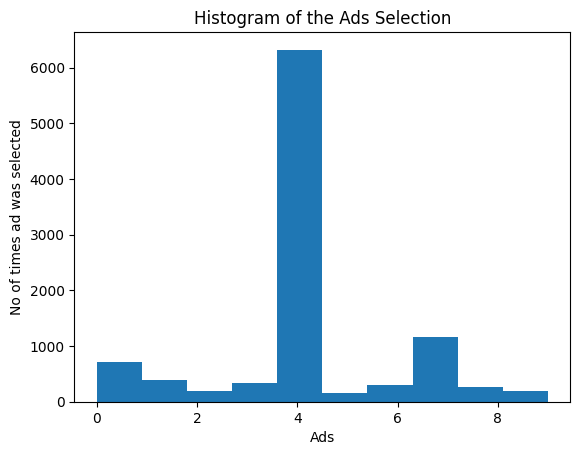

In [18]:
plt.hist(ads_selected)
plt.title("Histogram of the Ads Selection")
plt.xlabel("Ads")
plt.ylabel("No of times ad was selected")
plt.show()